In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [4]:
from sklearn import neighbors

# Build the model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

KNeighborsRegressor(n_neighbors=10)

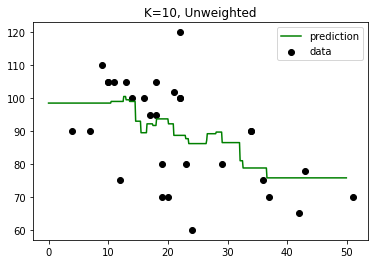

In [5]:
# FIRST LET'S RUN KNN REGRESSION:

# Generating a set of loudness values between `0` and `50`, incrementing by `0.1`:
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Generating predictions for each of the loudness values:
Y_ = knn.predict(T)

# Plotting the training data and the prediction line for the newly generated loudness values:
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

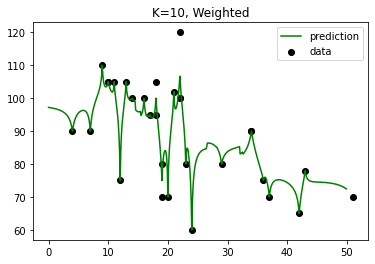

In [6]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up the prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


In [9]:
# NOW LET'S RUN AN "OLS REGRESSION MODEL" ON THE SAME DATASET:


from sklearn import linear_model
# "Y" is the target variable, in this case BPM:
Y = music.bpm
# "X" is the feature set which includes the
# "loudness" as a veriable:
X = pd.DataFrame(music.loudness)

# Create a "LinearRegression" model object
# from scikit-learn's linear_model   module:
lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS:
lrm.fit(X, Y)

# Inspect the results:
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-0.73257558]

Intercept: 
 105.3767386274061


In [10]:
import statsmodels.api as sm

# You need to manually add a constant
# in statemodel's sm:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bpm   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     12.03
Date:                Sat, 15 Jan 2022   Prob (F-statistic):            0.00171
Time:                        19:37:39   Log-Likelihood:                -119.05
No. Observations:                  30   AIC:                             242.1
Df Residuals:                      28   BIC:                             244.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.3767      5.221     20.185      0.000      94.683     116.070
loudness      -0.7326      0.211     -3.468      0.002      -1.165      -0.300
==============================================================================
Omnibus:                        0.540   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.356
Skew:                          -0.257   Prob(JB):                        0.837
Kurtosis:                       2.856   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both models seem to indicate that there is no correlation between the BPM and the loudness of the music piece.
OLS does allow us to peer deeper into the situation simply because the number of parameters it provides. 
If this would be a real world job I would do a lot more research before relying on any of these models. 